# Day 08. Exercise 05
# Clustering

## 0. Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [3]:
df = pd.read_csv('../data/regression.csv', index_col=0)
df = df.drop(columns=['pageviews'], axis=1)
df

,num_commits,AVG(diff)
uid,,
user_1,62,-64.400000
user_10,20,-74.800000
user_14,61,-159.000000
user_17,51,-61.600000
user_18,5,-5.666667
user_19,118,-98.750000
user_21,65,-95.500000
user_25,79,-92.600000
user_28,60,-86.400000


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

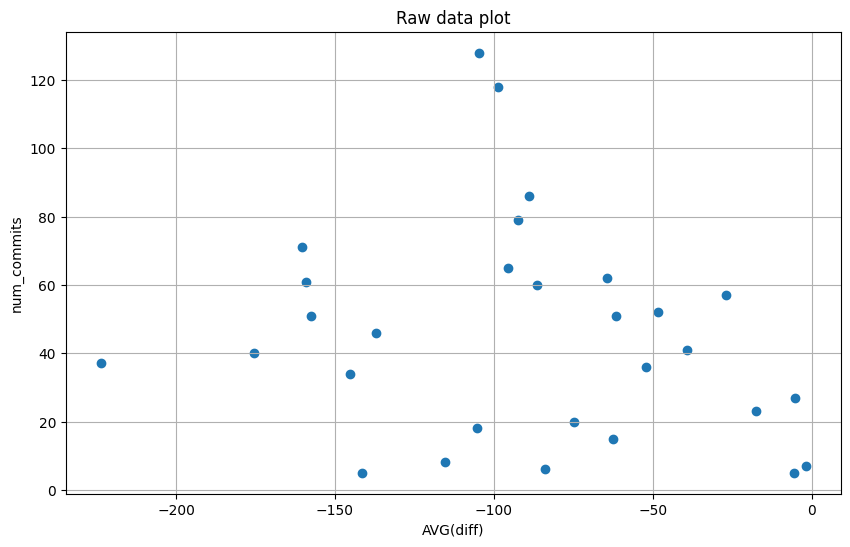

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['AVG(diff)'], y=df['num_commits'])
plt.xlabel('AVG(diff)')
plt.ylabel('num_commits')
plt.title('Raw data plot')
plt.grid()
plt.show()

K = 2		Inertia = 58205.49		Silhouette Score = 0.419
K = 3		Inertia = 32409.71		Silhouette Score = 0.445
K = 4		Inertia = 24153.94		Silhouette Score = 0.415
K = 5		Inertia = 17371.54		Silhouette Score = 0.352
K = 6		Inertia = 13041.75		Silhouette Score = 0.395
K = 7		Inertia = 9747.47		Silhouette Score = 0.396
K = 8		Inertia = 5633.33		Silhouette Score = 0.486
K = 9		Inertia = 4664.56		Silhouette Score = 0.454
K = 10		Inertia = 3847.88		Silhouette Score = 0.426
K = 11		Inertia = 3530.89		Silhouette Score = 0.381
K = 12		Inertia = 3112.39		Silhouette Score = 0.382
K = 13		Inertia = 2573.30		Silhouette Score = 0.387
K = 14		Inertia = 1892.03		Silhouette Score = 0.388
K = 15		Inertia = 1299.77		Silhouette Score = 0.420
K = 16		Inertia = 1195.37		Silhouette Score = 0.386
K = 17		Inertia = 951.14		Silhouette Score = 0.361
K = 18		Inertia = 864.22		Silhouette Score = 0.339
K = 19		Inertia = 767.22		Silhouette Score = 0.311
K = 20		Inertia = 666.21		Silhouette Score = 0.280
K = 21		Inertia = 5

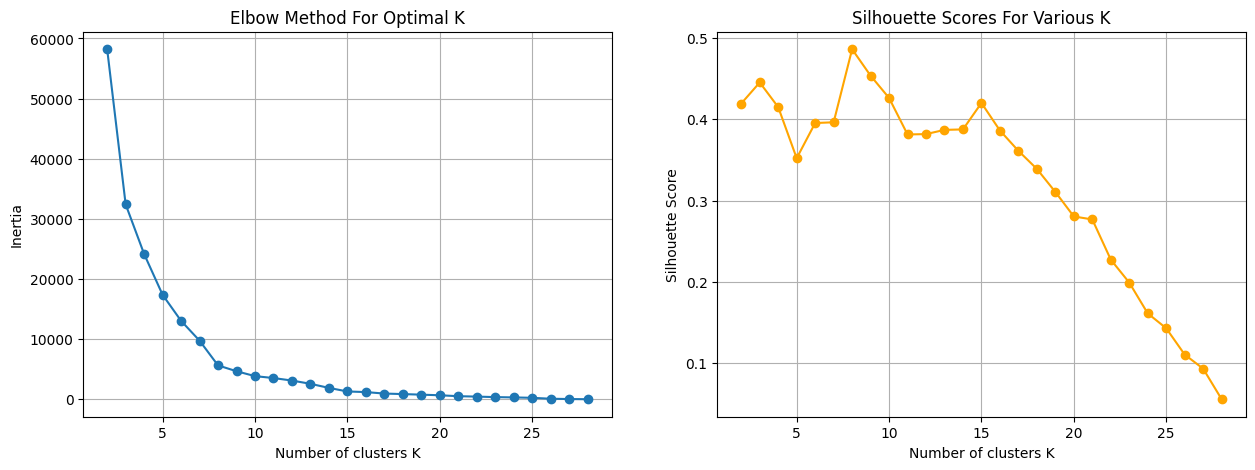

In [5]:
inertias = []
silhouette_scores = []
k_values = range(2, 29)

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=21)
  labels = kmeans.fit_predict(df)

  inertias.append(kmeans.inertia_)

  score = silhouette_score(df, labels)
  silhouette_scores.append(score)

  print(f"K = {k}\t\tInertia = {kmeans.inertia_:.2f}\t\tSilhouette Score = {score:.3f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(k_values, inertias, marker='o')
ax1.set_title('Elbow Method For Optimal K')
ax1.set_xlabel('Number of clusters K')
ax1.set_ylabel('Inertia')
ax1.grid(True)

ax2.plot(k_values, silhouette_scores, marker='o', color='orange')
ax2.set_title('Silhouette Scores For Various K')
ax2.set_xlabel('Number of clusters K')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True)

plt.show()

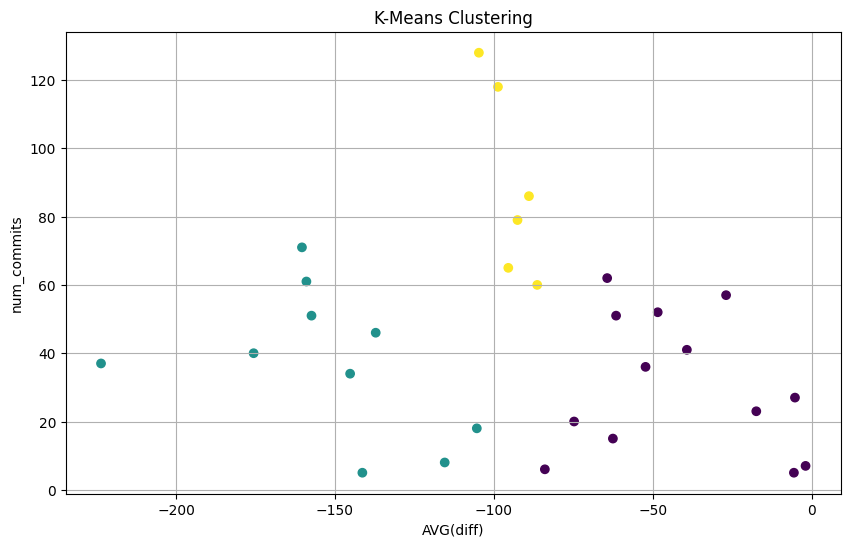

In [6]:
kmeans = KMeans(n_clusters=3, random_state=21)
kmeans.fit(df)

plt.figure(figsize=(10, 6))
plt.scatter(x=df['AVG(diff)'], y=df['num_commits'], c=kmeans.labels_)
plt.xlabel('AVG(diff)')
plt.ylabel('num_commits')
plt.title('K-Means Clustering')
plt.grid()
plt.show()

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

DBSCAN Silhouette Score = 0.544


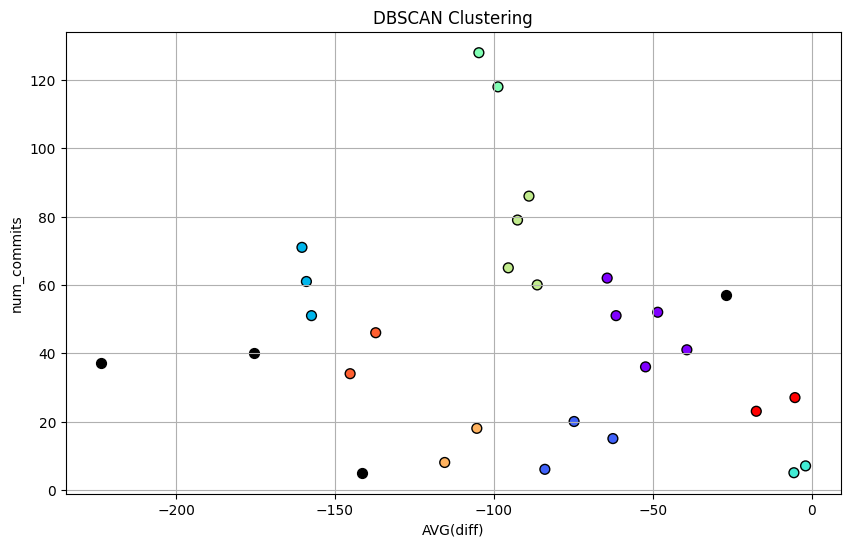

In [7]:
dbscan = DBSCAN(eps=20, min_samples=2)
labels = dbscan.fit_predict(df)

noise_mask = labels == -1
cluster_mask = ~noise_mask


if len(set(labels[cluster_mask])) > 1: # silhoutte score needs at least 2 clusters
  score = silhouette_score(df[cluster_mask], labels[cluster_mask])
  print(f"DBSCAN Silhouette Score = {score:.3f}")
else:
  print("DBSCAN Silhouette Score = N/A (only one cluster found)")

plt.figure(figsize=(10, 6))
# Рисуем кластеры
plt.scatter(df.loc[cluster_mask, 'AVG(diff)'], df.loc[cluster_mask, 'num_commits'], 
            c=labels[cluster_mask], cmap='rainbow', s=50, edgecolor='k')

# Рисуем шум чёрным
plt.scatter(df.loc[noise_mask, 'AVG(diff)'], df.loc[noise_mask, 'num_commits'], 
            c='k', s=50, edgecolor='k')

plt.xlabel('AVG(diff)')
plt.ylabel('num_commits')
plt.title('DBSCAN Clustering')
plt.grid()
plt.show()

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

HAC Silhouette Score = 0.464


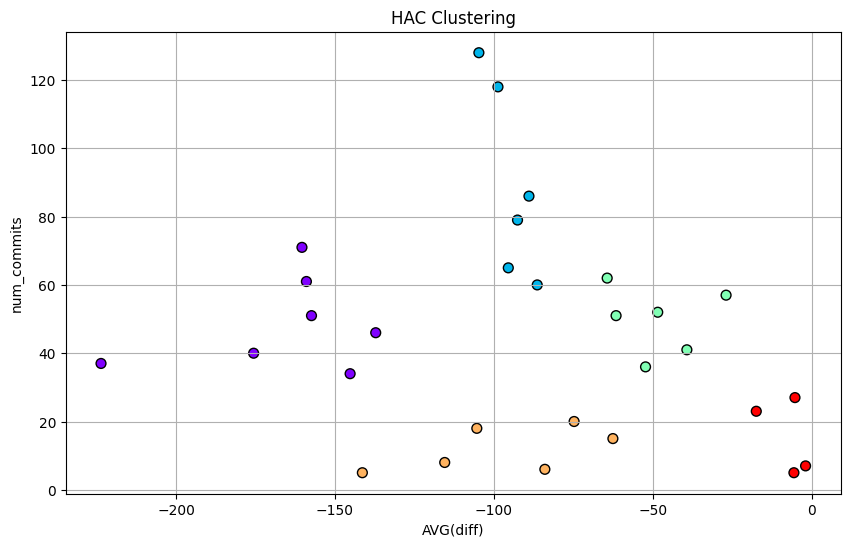

In [8]:
hac = AgglomerativeClustering(n_clusters=5)
labels = hac.fit_predict(df)

score = silhouette_score(df, labels)
print(f"HAC Silhouette Score = {score:.3f}")  

plt.figure(figsize=(10, 6))
plt.scatter(x=df['AVG(diff)'], y=df['num_commits'], c=labels, cmap='rainbow', s=50, edgecolor='k')
plt.xlabel('AVG(diff)')
plt.ylabel('num_commits')
plt.title('HAC Clustering')
plt.grid()
plt.show()

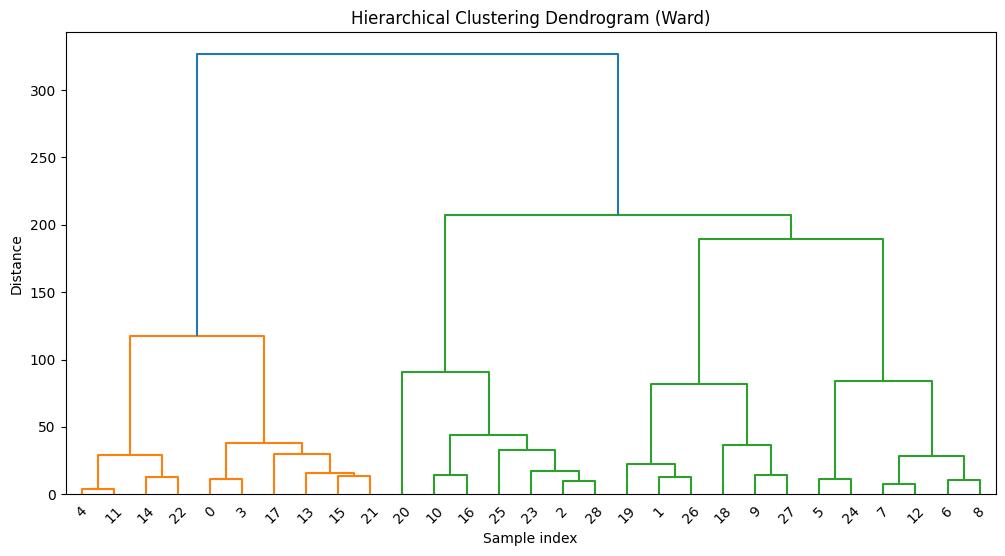

In [9]:
Z = linkage(df, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [10]:
def clustering_parameter_search(model_class, params: dict, param_name: str, param_range: range, X):
  """
  General function to optimize a clustering parameter using silhouette score.

  Args:
      model_class: Class
        Clustering model class (e.g., KMeans, DBSCAN, AgglomerativeClustering).
      params: dict
        Dictionary of fixed parameters for the clustering model.
      param_name: str
        Name of the parameter to optimize (e.g., 'n_clusters', 'eps').
      param_range: iterable
        Range of values to test for the parameter.
      X: array-like
        Input data for clustering.
      
  Returns:
      best_param: value
        The parameter value that yielded the highest silhouette score.
      best_score: float
        The highest silhouette score achieved.
  """

  scores= []
  models = []

  for val in param_range:
    current_params = params.copy()
    current_params[param_name] = val

    try:
      model = model_class(**current_params)
      labels = model.fit_predict(X)

      unique_labels = set(labels)
      n_clusters = len(unique_labels - {-1}) # Amount of clusters without noise

      if n_clusters > 1: # silhouette score needs at least 2 clusters
        score = silhouette_score(X, labels)
      else:
        score = -1
    except Exception:
        score = -1


    scores.append(score)
    models.append((val, model))
  

  # best parameter value
  best_idx = int(np.argmax(scores))
  best_value = param_range[best_idx]
  best_model = models[best_idx][1]
  best_labels = best_model.fit_predict(X)

  # Plotting
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))

  # sublot 1: silhouette vs parameter value
  axes[0].plot(param_range, scores, marker="o")
  axes[0].set_xlabel(param_name)
  axes[0].set_ylabel("Silhouette Score")
  axes[0].set_title(f"Silhouette vs {param_name}")
  axes[0].grid(True)

  # Subplot 2: scatter plot of clusters
  axes[1].scatter(X[:, 1], X[:, 0], c=best_labels, cmap="rainbow", s=50, alpha=0.7, edgecolor="k")
  axes[1].set_title(f"Best {param_name} = {best_value} (score={scores[best_idx]:.3f})")

  plt.tight_layout()
  plt.show()

  return best_value

### Findig best K for KMeans Algorithm

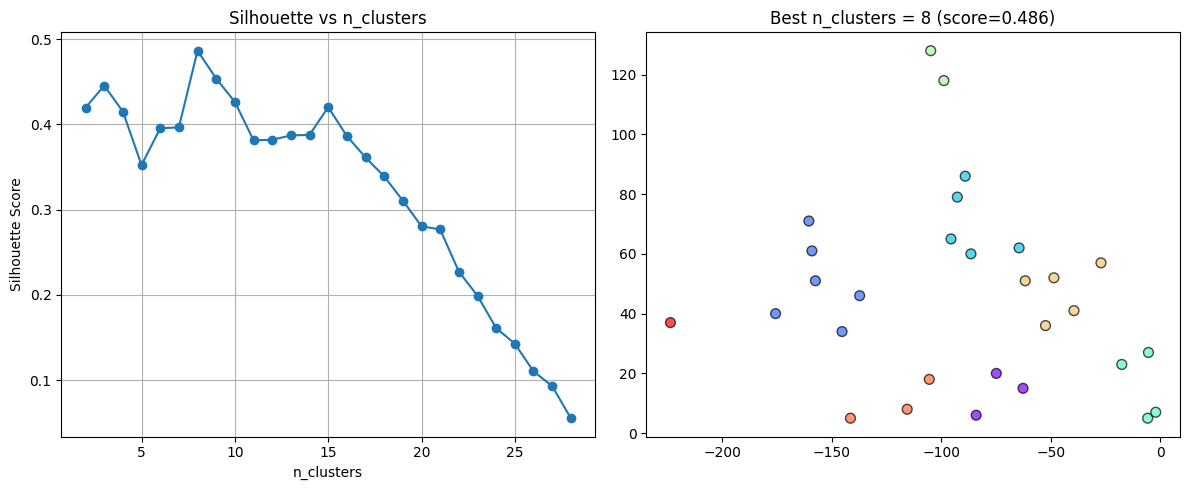

Best K found: 8


In [11]:
best_k = clustering_parameter_search(
  model_class=KMeans,
  params={"random_state": 21},
  param_name="n_clusters",
  param_range=range(2, 29),
  X=df.values
)

print("Best K found:", best_k)

### Finding best eps and min_samples for DBSCAN Algorithm

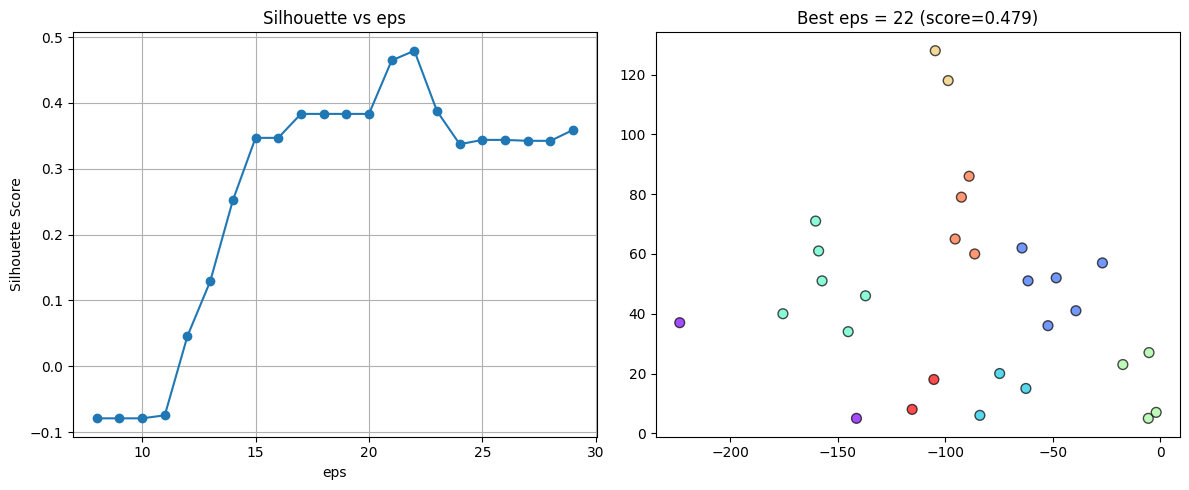

Best eps found: 22


In [12]:
best_eps = clustering_parameter_search(
  model_class=DBSCAN,
  params={"min_samples": 2},
  param_name="eps",
  param_range=range(8, 30),
  X=df.values
)

print("Best eps found:", best_eps)

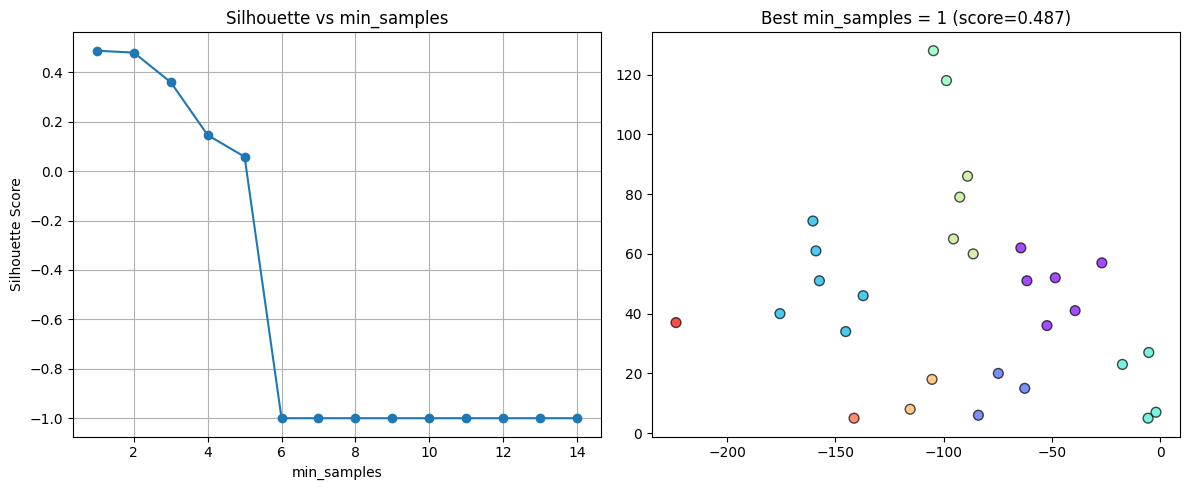

Best min_samples found: 1


In [13]:
best_min_sample = clustering_parameter_search(
  model_class=DBSCAN, 
  params={"eps": best_eps},
  param_name="min_samples",
  param_range=range(1, 15),
  X=df.values
)

print("Best min_samples found:", best_min_sample)

### Finding best n_clusters for AgglomerativeClustering Algorithm

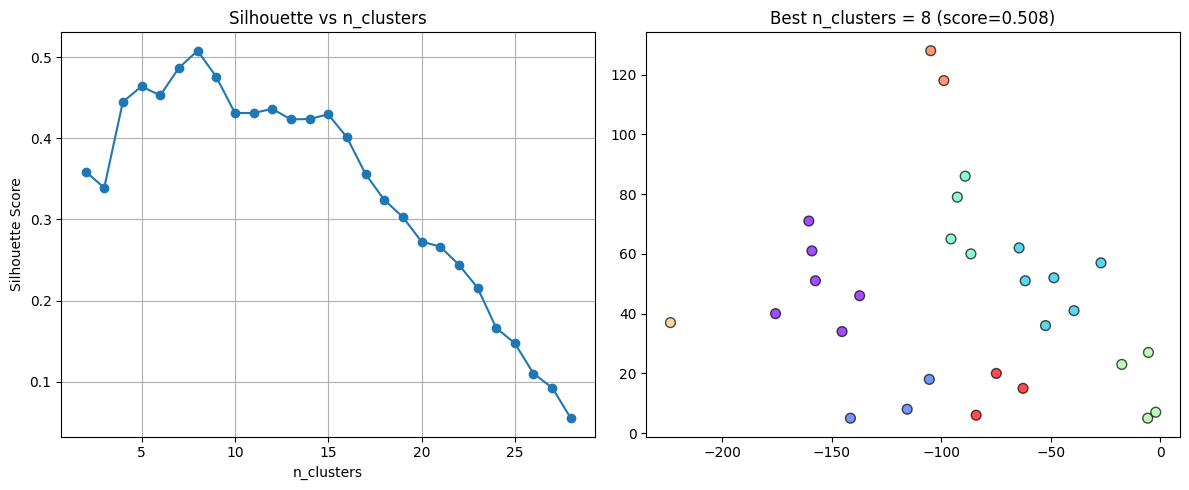

Best n_clusters found: 8


In [14]:
best_clusters = clustering_parameter_search(
  model_class=AgglomerativeClustering,
  params={},
  param_name="n_clusters",
  param_range=range(2, 29),
  X=df.values
)

print("Best n_clusters found:", best_clusters)